C:\Users\User\AppData\Local\Temp\ipykernel_5572\296571795.py:11: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



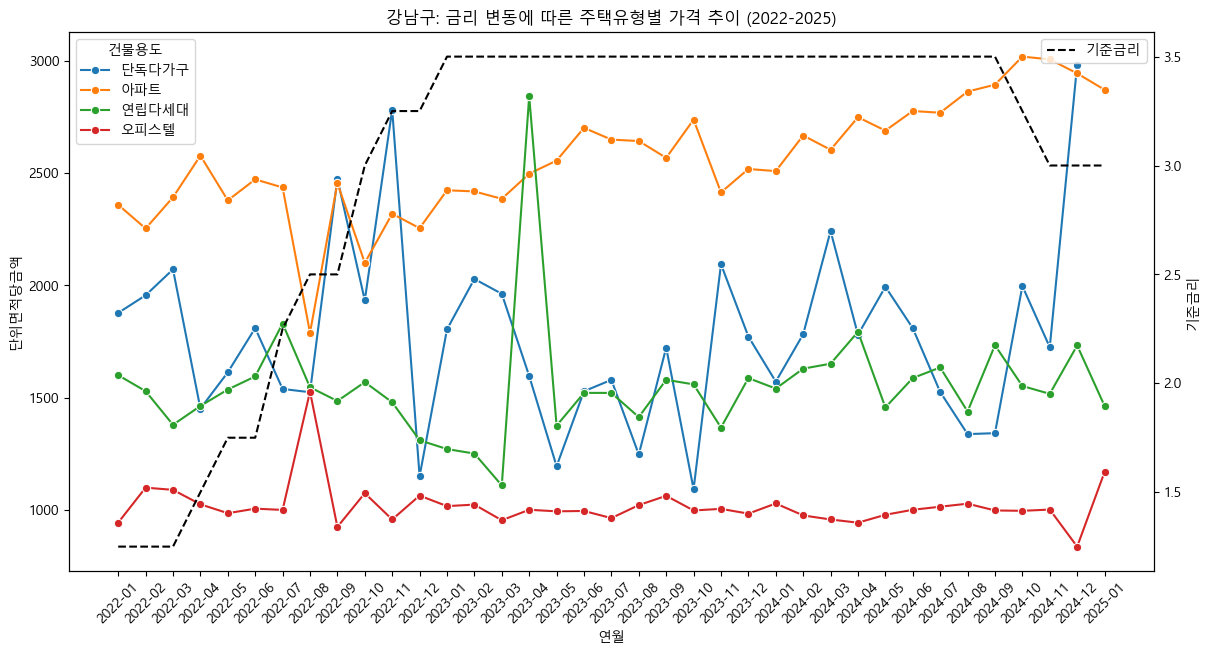

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 폰트 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')

# 1. 데이터 로드 및 전처리 (2022년 이후)
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df = df[df['계약일'] >= '2022-01-01'].dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])
df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 금리 데이터 맵
ir_map = {'2022-01': 1.25, '2022-02': 1.25, '2022-03': 1.25, '2022-04': 1.50, '2022-05': 1.75, '2022-06': 1.75, '2022-07': 2.25, '2022-08': 2.50, '2022-09': 2.50, '2022-10': 3.00, '2022-11': 3.25, '2022-12': 3.25, '2023-01': 3.50, '2023-02': 3.50, '2023-03': 3.50, '2023-04': 3.50, '2023-05': 3.50, '2023-06': 3.50, '2023-07': 3.50, '2023-08': 3.50, '2023-09': 3.50, '2023-10': 3.50, '2023-11': 3.50, '2023-12': 3.50, '2024-01': 3.50, '2024-02': 3.50, '2024-03': 3.50, '2024-04': 3.50, '2024-05': 3.50, '2024-06': 3.50, '2024-07': 3.50, '2024-08': 3.50, '2024-09': 3.50, '2024-10': 3.25, '2024-11': 3.00, '2024-12': 3.00, '2025-01': 3.00}

# 강남구 집계
gangnam_stats = df[df['자치구명'] == '강남구'].groupby(['연월', '건물용도'])['단위면적당금액'].mean().reset_index()
gangnam_stats['기준금리'] = gangnam_stats['연월'].map(ir_map)

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(data=gangnam_stats, x='연월', y='단위면적당금액', hue='건물용도', marker='o', ax=ax1)
ax2 = ax1.twinx()
sns.lineplot(data=gangnam_stats.drop_duplicates('연월'), x='연월', y='기준금리', color='black', linestyle='--', ax=ax2, label='기준금리')
plt.title('강남구: 금리 변동에 따른 주택유형별 가격 추이 (2022-2025)')
ax1.tick_params(axis='x', rotation=45)
plt.show()

In [25]:
df

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명,연월,단위면적당금액
0,2025,11320,도봉구,10600,방학동,1.0,대지,638.0,10.0,한신빌라(638-10),...,16.00,4.0,NaN,NaN,1994.0,연립다세대,중개거래,서울 도봉구,2025-01,392.989910
1,2025,11380,은평구,10800,역촌동,NaN,NaN,NaN,NaN,NaN,...,182.00,NaN,NaN,NaN,1972.0,단독다가구,직거래,NaN,2025-01,534.827214
2,2025,11500,강서구,10200,등촌동,1.0,대지,628.0,13.0,현대프린스텔,...,35.71,6.0,NaN,NaN,1999.0,오피스텔,중개거래,서울 강서구,2025-01,393.730887
3,2025,11620,관악구,10200,신림동,1.0,대지,1639.0,51.0,푸리마타운,...,26.16,8.0,NaN,NaN,2014.0,오피스텔,중개거래,서울 관악구,2025-01,679.144385
4,2025,11530,구로구,10600,고척동,1.0,대지,339.0,0.0,고척파크푸르지오,...,0.00,9.0,NaN,NaN,2009.0,아파트,중개거래,"서울 구로구, 서울 양천구",2025-01,1402.571381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235666,2022,11110,종로구,18600,신영동,NaN,NaN,NaN,NaN,NaN,...,222.00,NaN,NaN,NaN,2005.0,단독다가구,NaN,NaN,2016-06,1353.535354
235667,2022,11290,성북구,13300,정릉동,1.0,대지,260.0,10.0,진안빌라A(260-10),...,42.40,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN,2016-06,603.968939
235668,2022,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,182.00,NaN,NaN,NaN,1968.0,단독다가구,NaN,NaN,2016-04,747.688961
235669,2022,11290,성북구,13300,정릉동,1.0,대지,260.0,10.0,진안빌라A(260-10),...,42.40,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN,2016-04,603.968939


C:\Users\User\AppData\Local\Temp\ipykernel_5572\1865087341.py:13: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



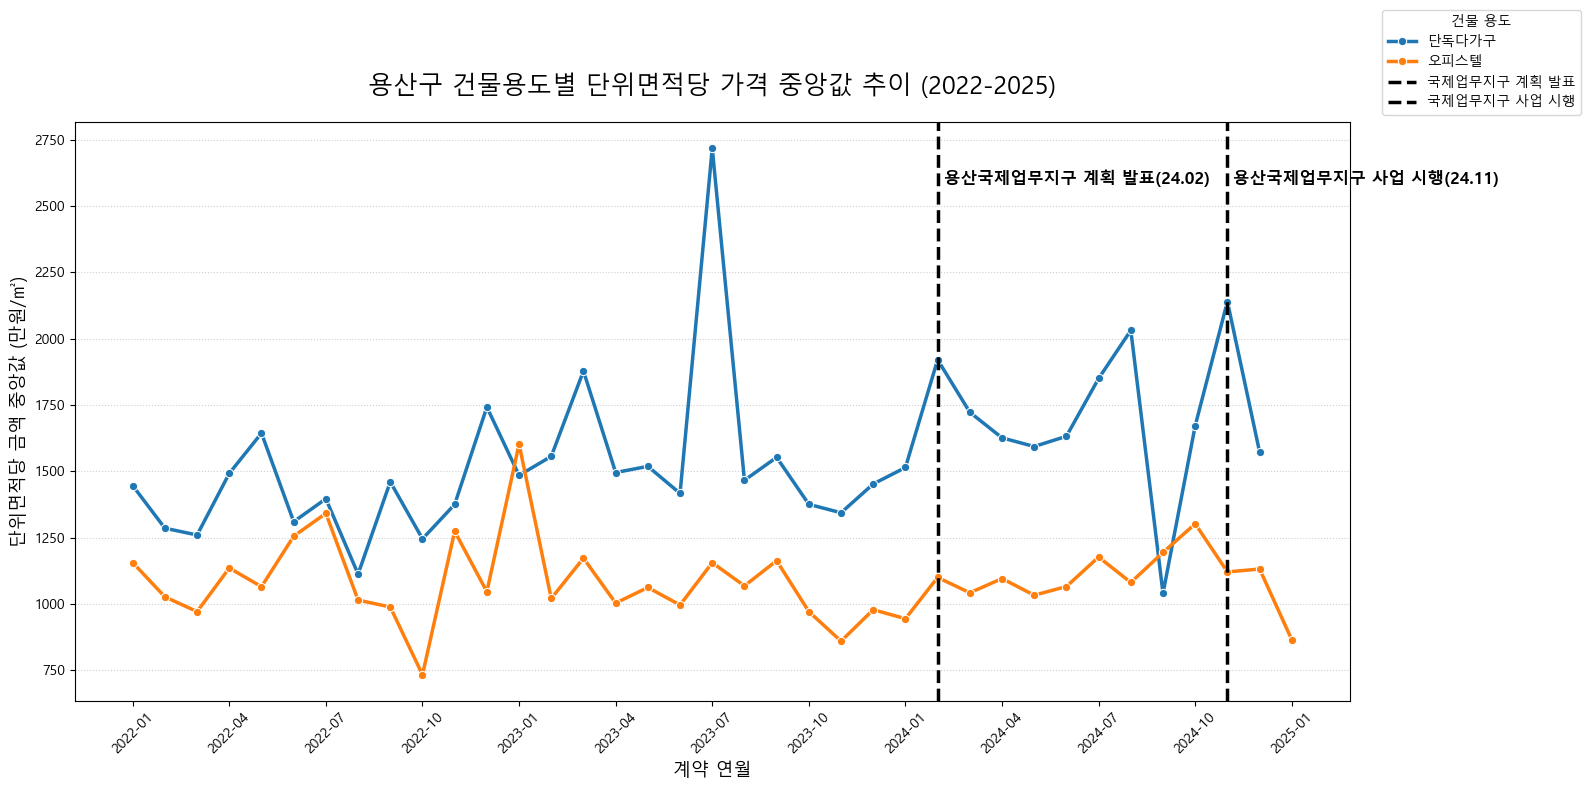

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import platform

# 1. 한글 폰트 및 환경 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드 및 엄격한 날짜 필터링 (2022 ~ 2025)
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')

# 파일 내 실제 2022년 이후 데이터만 추출
df = df[(df['계약일'] >= '2022-01-01') & (df['계약일'] <= '2025-12-31')].copy()
df = df.dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])

# 단위면적당 금액 및 연월 컬럼 생성
df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 3. 용산구 데이터 추출 (단독다가구 포함 모든 용도)
yongsan_df = df[df['자치구명'] == '용산구'].copy()
drop_targets = ['아파트', '연립다세대']
yongsan_df = yongsan_df[~yongsan_df['건물용도'].isin(drop_targets)]

# 4. 중앙값(Median)으로 집계 (평균의 함정 제거)
# 용산구 내 주요 건물용도별로 그룹화
yongsan_stats = yongsan_df.groupby(['연월', '건물용도'])['단위면적당금액'].median().reset_index()

# 5. 시각화
plt.figure(figsize=(16, 8))

# 선 그래프 시각화
sns.lineplot(data=yongsan_stats, x='연월', y='단위면적당금액', hue='건물용도', 
             marker='o', linewidth=2.5, palette='tab10')

# 용산국제업무지구 발표 시점 강조 (2024년 2월)
a_date = '2024-02'
if a_date in yongsan_stats['연월'].values:
    plt.axvline(x=a_date, color='black', linestyle='--', linewidth=2.5, label='국제업무지구 계획 발표')
    # 텍스트 위치는 데이터의 최대값 부근으로 자동 설정
    y_max = yongsan_stats['단위면적당금액'].max()
    plt.text(a_date, y_max * 0.95, ' 용산국제업무지구 계획 발표(24.02)', 
             color='black', fontweight='bold', fontsize=12)

an_date = '2024-11'
if an_date in yongsan_stats['연월'].values:
    plt.axvline(x=an_date, color='black', linestyle='--', linewidth=2.5, label='국제업무지구 사업 시행')
    # 텍스트 위치는 데이터의 최대값 부근으로 자동 설정
    y_max = yongsan_stats['단위면적당금액'].max()
    plt.text(an_date, y_max * 0.95, ' 용산국제업무지구 사업 시행(24.11)', 
             color='black', fontweight='bold', fontsize=12)

# X축 겹침 방지: 3개월 단위로 표시
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.xticks(rotation=45)

plt.title('용산구 건물용도별 단위면적당 가격 중앙값 추이 (2022-2025)', fontsize=18, pad=20)
plt.ylabel('단위면적당 금액 중앙값 (만원/㎡)', fontsize=13)
plt.xlabel('계약 연월', fontsize=13)
plt.grid(True, axis='y', linestyle=':', alpha=0.6)
plt.legend(title='건물 용도', bbox_to_anchor=(1.02, 1), loc='lower left')
plt.tight_layout()

plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_5572\468813427.py:13: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.



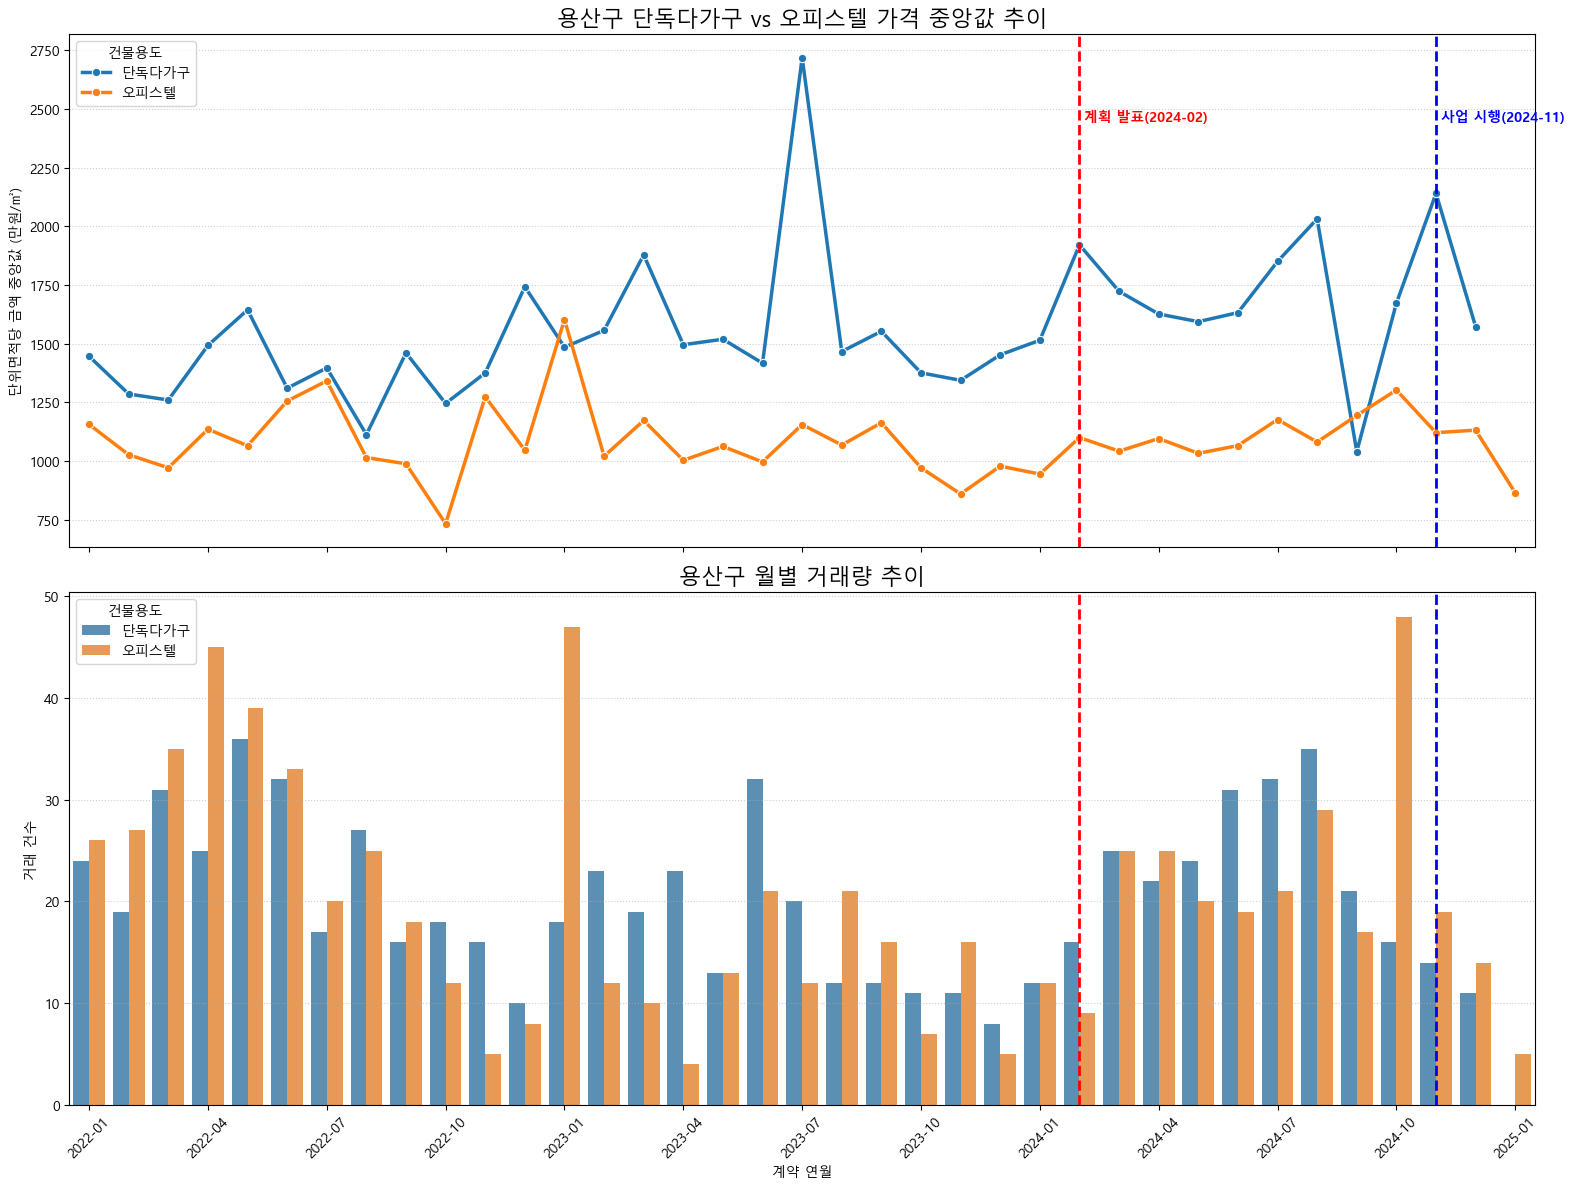

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import platform

# 1. 한글 폰트 및 환경 설정
if platform.system() == 'Darwin': plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 데이터 로드 및 전처리
df = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df['계약일'] = pd.to_datetime(df['계약일'], format='%Y%m%d', errors='coerce')
df = df[(df['계약일'] >= '2022-01-01') & (df['계약일'] <= '2025-12-31')].copy()
df = df.dropna(subset=['계약일', '물건금액(만원)', '건물면적(㎡)'])

df['연월'] = df['계약일'].dt.to_period('M').astype(str)
df['단위면적당금액'] = df['물건금액(만원)'] / df['건물면적(㎡)']

# 3. 용산구 데이터 추출 (단독다가구, 오피스텔만 추출)
target_usage = ['단독다가구', '오피스텔']
yongsan_df = df[(df['자치구명'] == '용산구') & (df['건물용도'].isin(target_usage))].copy()

# 4. 월별 집계 (중앙값 및 거래건수)
yongsan_stats = yongsan_df.groupby(['연월', '건물용도'])['단위면적당금액'].agg(['median', 'count']).reset_index()

# 5. 시각화 (2단 그래프 구성)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# --- 상단: 가격 중앙값 추이 ---
sns.lineplot(data=yongsan_stats, x='연월', y='median', hue='건물용도', 
             marker='o', linewidth=2.5, ax=ax1, palette=['#1f77b4', '#ff7f0e'])

# 이벤트 선 추가 (상단)
a_date, an_date = '2024-02', '2024-11'
y_max_val = yongsan_stats['median'].max()

for d, txt, clr in zip([a_date, an_date], ['계획 발표', '사업 시행'], ['red', 'blue']):
    if d in yongsan_stats['연월'].values:
        ax1.axvline(x=d, color=clr, linestyle='--', linewidth=2)
        ax1.text(d, y_max_val * 0.9, f' {txt}({d})', color=clr, fontweight='bold')

ax1.set_title('용산구 단독다가구 vs 오피스텔 가격 중앙값 추이', fontsize=16)
ax1.set_ylabel('단위면적당 금액 중앙값 (만원/㎡)')
ax1.grid(True, axis='y', linestyle=':', alpha=0.6)

# --- 하단: 거래량 추이 (막대 그래프) ---
sns.barplot(data=yongsan_stats, x='연월', y='count', hue='건물용도', ax=ax2, palette=['#1f77b4', '#ff7f0e'], alpha=0.8)

# 이벤트 선 추가 (하단)
for d, clr in zip([a_date, an_date], ['red', 'blue']):
    if d in yongsan_stats['연월'].values:
        ax2.axvline(x=d, color=clr, linestyle='--', linewidth=2)

ax2.set_title('용산구 월별 거래량 추이', fontsize=16)
ax2.set_ylabel('거래 건수')
ax2.set_xlabel('계약 연월')
ax2.grid(True, axis='y', linestyle=':', alpha=0.6)

# X축 레이아웃 정리
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [54]:
# 용산구 25년 초 평균 vs 중앙값 직접 비교 검증 코드
yongsan_25 = yongsan_df[yongsan_df['연월'] >= '2024-10']
verification = yongsan_25.groupby(['연월', '건물용도'])['단위면적당금액'].agg(['mean', 'median', 'count'])
print(verification)

                      mean       median  count
연월      건물용도                                  
2024-10 단독다가구  2354.745506  1672.113857     16
        아파트    2469.133585  2422.880061     68
        연립다세대  1906.634435  1809.226851     56
        오피스텔   1166.798511  1302.367501     48
2024-11 단독다가구  2297.966474  2140.331704     14
        아파트    2353.765514  2223.944198     74
        연립다세대  1840.913487  1625.076816     40
        오피스텔   1220.618170  1120.723555     19
2024-12 단독다가구  2586.651451  1572.915886     11
        아파트    2156.789937  1978.989054     42
        연립다세대  1856.391712  1673.640167     33
        오피스텔   1397.485155  1131.705957     14
2025-01 아파트    1672.278337  1625.633816      8
        연립다세대  2329.139000  2329.139000      2
        오피스텔    863.403258   864.849018      5


In [49]:
yongsan_stats

,연월,건물용도,단위면적당금액
0,2022-01,단독다가구,1446.168648
1,2022-01,아파트,2146.051057
2,2022-01,연립다세대,1125.271150
3,2022-01,오피스텔,1155.975413
4,2022-02,단독다가구,1285.606252
...,...,...,...
142,2024-12,연립다세대,1673.640167
143,2024-12,오피스텔,1131.705957
144,2025-01,아파트,1625.633816
145,2025-01,연립다세대,2329.139000


In [51]:
test = df[df['자치구명'] == '용산구'].groupby(['연월', '건물용도'])['단위면적당금액'].mean().reset_index()
test[test['건물용도'] =='단독다가구']

,연월,건물용도,단위면적당금액
0,2022-01,단독다가구,2027.307556
4,2022-02,단독다가구,1802.466303
8,2022-03,단독다가구,1912.261513
12,2022-04,단독다가구,2208.463498
16,2022-05,단독다가구,1980.085661
20,2022-06,단독다가구,1836.287520
24,2022-07,단독다가구,1929.814926
28,2022-08,단독다가구,1525.689301
32,2022-09,단독다가구,2132.751773
36,2022-10,단독다가구,1399.787549


In [23]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np

# 1. 데이터 로드 및 2022-2025 필터링
df_price = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df_price['계약일'] = pd.to_datetime(df_price['계약일'], format='%Y%m%d', errors='coerce')
df_price = df_price[(df_price['계약일'] >= '2022-01-01') & (df_price['계약일'] <= '2025-12-31')]

df_plan = pd.read_csv('서울시 도시계획 정비사업 현황.csv', encoding='cp949')

# 2. 정비사업 데이터에서 '재개발' 포함 행 추출 및 구별 집계
# '소분류'나 '지역명' 등에 '재개발'이 포함된 데이터 필터링
redevelopment = df_plan[df_plan['소분류'].str.contains('재개발', na=False)].copy()
redev_counts = redevelopment.groupby('지자체').size().reset_index(name='재개발건수')

# 3. 부동산 데이터 구별 집계 (거래량 및 가격 중앙값)
price_stats = df_price.groupby('자치구명')['물건금액(만원)'].agg(['count', 'median']).reset_index()
price_stats.columns = ['자치구명', '거래량', '가격중앙값']

# 4. 자치구 좌표 데이터 (중심점)
seoul_geo = {
    '강남구': [37.495, 127.062], '강동구': [37.549, 127.146], '강북구': [37.642, 127.011],
    '강서구': [37.561, 126.825], '관악구': [37.465, 126.943], '광진구': [37.546, 127.085],
    '구로구': [37.494, 126.856], '금천구': [37.460, 126.900], '노원구': [37.652, 127.075],
    '도봉구': [37.669, 127.032], '동대문구': [37.581, 127.054], '동작구': [37.502, 126.951],
    '마포구': [37.559, 126.908], '서대문구': [37.577, 126.939], '서초구': [37.473, 127.031],
    '성동구': [37.551, 127.041], '성북구': [37.605, 127.017], '송파구': [37.505, 127.115],
    '양천구': [37.524, 126.855], '영등포구': [37.522, 126.910], '용산구': [37.530, 126.980],
    '은평구': [37.619, 126.927], '종로구': [37.594, 126.977], '중구': [37.560, 126.995], '중랑구': [37.597, 127.092]
}

# 5. 데이터 병합
final_map_df = pd.merge(redev_counts, price_stats, left_on='지자체', right_on='자치구명')

# 6. 지도 시각화
m = folium.Map(location=[37.563, 126.986], zoom_start=11, tiles='cartodbpositron')

# 컬러맵 설정 (가격 중앙값 기준: 낮음(노랑) -> 높음(빨강))
import matplotlib.colors as colors
import matplotlib.cm as cm

# 가격 중앙값을 0~1 사이로 정규화하여 색상 매핑
norm = colors.Normalize(vmin=final_map_df['가격중앙값'].min(), vmax=final_map_df['가격중앙값'].max())
colormap = cm.get_cmap('YlOrRd')

for _, row in final_map_df.iterrows():
    gu = row['자치구명']
    if gu in seoul_geo:
        color = colors.to_hex(colormap(norm(row['가격중앙값'])))
        
        folium.CircleMarker(
            location=seoul_geo[gu],
            radius=row['재개발건수'] * 1.5, # 원의 크기: 재개발 건수에 비례
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            popup=f"<b>{gu}</b><br>재개발 건수: {row['재개발건수']}<br>거래 중앙값: {row['가격중앙값']:.0f}만원",
        ).add_to(m)

m.save('seoul_redevelopment_map.html')
m

C:\Users\User\AppData\Local\Temp\ipykernel_5572\2042985218.py:7: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\User\AppData\Local\Temp\ipykernel_5572\2042985218.py:46: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [67]:
import pandas as pd
import folium
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm

# 1. 데이터 로드 및 2022-2025 필터링
df_price = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df_price['계약일'] = pd.to_datetime(df_price['계약일'], format='%Y%m%d', errors='coerce')
df_price = df_price[(df_price['계약일'] >= '2022-01-01') & (df_price['계약일'] <= '2025-12-31')]

# [수정포인트] 단위면적당 금액 컬럼 생성 (단가 기준 분석)
df_price['단위면적당금액'] = df_price['물건금액(만원)'] / df_price['건물면적(㎡)']

# 2. 부동산 데이터 구별 집계 (단위면적당 중앙값 사용)
# '물건금액'이 아닌 '단위면적당금액'의 중앙값을 구합니다.
price_stats = df_price.groupby('자치구명')['단위면적당금액'].agg(['count', 'median']).reset_index()
price_stats.columns = ['자치구명', '거래량', '단위면적중앙값']

# 3. 정비사업 데이터 처리 (기존과 동일)
df_plan = pd.read_csv('서울시 도시계획 정비사업 현황.csv', encoding='cp949')
redevelopment = df_plan[df_plan['소분류'].str.contains('재개발', na=False)].copy()
redev_counts = redevelopment.groupby('지자체').size().reset_index(name='재개발건수')

# 4. 데이터 병합
final_map_df = pd.merge(redev_counts, price_stats, left_on='지자체', right_on='자치구명')

# 5. 지도 시각화 설정 (라벨 및 클릭 기능 포함)
m = folium.Map(location=[37.563, 126.986], zoom_start=11, tiles='cartodbpositron')

norm = colors.Normalize(vmin=final_map_df['단위면적중앙값'].min(), vmax=final_map_df['단위면적중앙값'].max())
cmap = cm.get_cmap('YlOrRd')

# 6. 마커 및 라벨 추가
for _, row in final_map_df.iterrows():
    gu = row['자치구명']
    if gu in seoul_geo:  # seoul_geo 좌표 데이터는 기존 것 사용
        coord = seoul_geo[gu]
        color_hex = colors.to_hex(cmap(norm(row['단위면적중앙값'])))
        
        # 원형 마커
        folium.CircleMarker(
            location=coord,
            radius=row['재개발건수'] * 1.5,
            color=color_hex,
            fill=True,
            fill_color=color_hex,
            fill_opacity=0.7,
            popup=folium.Popup(f"<b>{gu}</b><br>재개발: {row['재개발건수']}건<br>단위면적 중앙값: {row['단위면적중앙값']:.1f}만원/㎡", max_width=250)
        ).add_to(m)
        
        # 구 이름 라벨 (클릭 방해 금지 적용)
        folium.map.Marker(
            location=coord,
            icon=folium.DivIcon(
                icon_size=(100,20),
                icon_anchor=(50,10),
                html=f'<div style="font-size: 10pt; font-weight: bold; color: black; text-align: center; text-shadow: 2px 2px 2px white; pointer-events: none;">{gu}</div>'
            )
        ).add_to(m)

m.save('seoul_unit_price_map.html')
m

C:\Users\User\AppData\Local\Temp\ipykernel_5572\2065921780.py:8: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\User\AppData\Local\Temp\ipykernel_5572\2065921780.py:32: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [68]:
# [수정] 비정상 데이터 필터링 및 아파트/단독 분리 확인
# 1. 너무 낮은 단가는 데이터 오류일 가능성이 커서 제외 (1㎡당 200만원 미만 제외)
df_filtered = df_price[df_price['단위면적당금액'] > 200].copy()

# 2. 자치구별 + 건물용도별 중앙값 다시 확인
check_stats = df_filtered.groupby(['자치구명', '건물용도'])['단위면적당금액'].median().unstack()

# 3. 은평구의 용도별 평당가(3.3 곱하기) 출력
eunpyeong = check_stats.loc['은평구'] * 3.3
print("--- 은평구 용도별 평당 시세 (단위: 만원) ---")
print(eunpyeong)

--- 은평구 용도별 평당 시세 (단위: 만원) ---
건물용도
단독다가구    2025.886243
아파트      3683.757418
연립다세대    2051.644737
오피스텔     2033.092765
Name: 은평구, dtype: float64


In [69]:
import pandas as pd
import folium
import numpy as np
import matplotlib.colors as colors
import matplotlib.cm as cm

# 1. 데이터 로드 및 2022-2025 필터링
df_price = pd.read_csv('서울시 부동산 실거래가 정보(2022~2025).csv', encoding='cp949')
df_price['계약일'] = pd.to_datetime(df_price['계약일'], format='%Y%m%d', errors='coerce')
df_price = df_price[(df_price['계약일'] >= '2022-01-01') & (df_price['계약일'] <= '2025-12-31')]

# 단위면적당 금액(만원/㎡) 계산
df_price['단위면적당금액'] = df_price['물건금액(만원)'] / df_price['건물면적(㎡)']

# 2. 정비사업 데이터 처리 (재개발 건수 집계)
df_plan = pd.read_csv('서울시 도시계획 정비사업 현황.csv', encoding='cp949')
redevelopment = df_plan[df_plan['소분류'].str.contains('재개발', na=False)].copy()
redev_counts = redevelopment.groupby('지자체').size().reset_index(name='재개발건수')

# 3. 자치구별 상위 25%(75% 분위수) 가격 추출
# 중앙값(50%)보다 재개발 기대감이 반영된 상위권 가격이 연관성 분석에 유리함
price_stats = df_price.groupby('자치구명')['단위면적당금액'].agg([
    'count', 
    ('상위25%가격', lambda x: x.quantile(0.75))
]).reset_index()

# 4. 데이터 병합
final_map_df = pd.merge(redev_counts, price_stats, left_on='지자체', right_on='자치구명')

# 5. 지도 시각화
m = folium.Map(location=[37.563, 126.986], zoom_start=11, tiles='cartodbpositron')

# 컬러맵 설정 (상위 25% 가격 기준)
norm = colors.Normalize(vmin=final_map_df['상위25%가격'].min(), vmax=final_map_df['상위25%가격'].max())
cmap = cm.get_cmap('YlOrRd')

for _, row in final_map_df.iterrows():
    gu = row['자치구명']
    if gu in seoul_geo:  # 기존 seoul_geo 좌표 활용
        coord = seoul_geo[gu]
        color_hex = colors.to_hex(cmap(norm(row['상위25%가격'])))
        
        # 원형 마커 (재개발 건수 = 크기, 가격 = 색상)
        folium.CircleMarker(
            location=coord,
            radius=row['재개발건수'] * 1.5,
            color=color_hex,
            fill=True,
            fill_color=color_hex,
            fill_opacity=0.7,
            popup=folium.Popup(f"<b>{gu}</b><br>재개발: {row['재개발건수']}건<br>상위 25% 평당가: {(row['상위25%가격']*3.3):.0f}만원", max_width=250)
        ).add_to(m)
        
        # 구 이름 라벨 상시 노출 (클릭 방해 방지 속성 포함)
        folium.map.Marker(
            location=coord,
            icon=folium.DivIcon(
                icon_size=(100,20),
                icon_anchor=(50,10),
                html=f'''<div style="
                            font-size: 10pt; 
                            font-weight: bold; 
                            color: black; 
                            text-align: center; 
                            text-shadow: 2px 2px 2px white;
                            pointer-events: none; 
                        ">{gu}</div>'''
            )
        ).add_to(m)

m.save('seoul_redevelopment_top25_map.html')
m

C:\Users\User\AppData\Local\Temp\ipykernel_5572\340385811.py:8: DtypeWarning:

Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\User\AppData\Local\Temp\ipykernel_5572\340385811.py:35: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

